In [1]:
import pandas as pd
import seaborn as sns
# df = pd.read_csv('/Users/anmol_gorakshakar/python/machine_learning/heart_disease/heart_disease.csv')
df = pd.read_csv('/Users/anmol_gorakshakar/Downloads/fastball_train1.csv')

<AxesSubplot:>

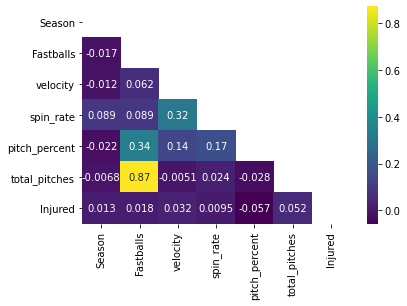

In [198]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', mask = np.triu(df.corr()))

In [2]:
df.sample(n=10)

,player_name,Season,Fastballs,velocity,spin_rate,pitch_percent,total_pitches,Injured
1822,Jesus Sucre,2017,13,85.0,1833,41.9,31,0
425,Roman Mendez,2015,123,93.9,2169,59.7,206,0
984,Will Smith,2016,180,92.3,2249,52.2,345,0
161,Justin Verlander,2015,456,93.3,2489,55.7,819,0
931,Matt Thornton,2016,252,90.8,1898,93.7,269,0
177,Ryan Mattheus,2015,430,93.1,2142,83.8,513,0
2202,Jefry Rodriguez,2018,229,95.3,2316,64.0,358,0
2474,Miguel Diaz,2018,19,96.8,2432,55.9,34,0
1100,Bobby Parnell,2016,66,94.6,2125,66.0,100,0
1830,Steve Cishek,2017,11,89.9,2274,2.9,379,0


In [3]:
df = df[['Fastballs', 'velocity', 'spin_rate','pitch_percent', 'total_pitches','Injured']]

<AxesSubplot:>

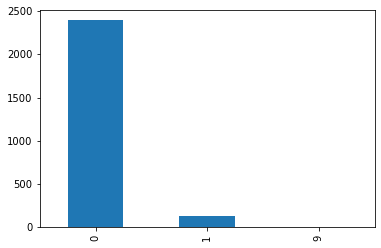

In [20]:
df.Injured.value_counts().plot(kind='bar')

In [5]:
def preprocess_categorical(dataframe):
    df = dataframe.copy()
    cols = df.columns
    for col in cols:
        categorical_dict = {}
        if df[col].dtype == 'object':
            unique_values = {v:k for k,v in zip(range(len(df[col].unique())), df[col].unique())}
            categorical_dict[col] = unique_values
            print(unique_values)
            df[col] = df[col].apply(lambda x: unique_values[x])
    return df

processed_df = preprocess_categorical(df)

In [7]:
processed_df.sample()

,Fastballs,velocity,spin_rate,pitch_percent,total_pitches,Injured
1197,11,92.3,2072,1.4,771,9


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test = train_test_split(processed_df, 
                         test_size = 0.1,
#                          stratify=processed_df.HeartDisease)
                         stratify=processed_df.Injured)


# X_test_label = X_test.HeartDisease
X_test_label = X_test.Injured
# X_test = X_test[[i for i in X_test if i!='HeartDisease']]
X_test = X_test[[i for i in X_test if i!='Injured']]


# X_train_label = X_train.HeartDisease
X_train_label = X_train.Injured
# X_train = X_train[[i for i in X_train if i!='HeartDisease']]
X_train = X_train[[i for i in X_train if i!='Injured']]


X_train = X_train.to_numpy()
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [15]:
from keras.layers import Dense, Dropout, Activation, LSTM, Flatten, MaxPooling1D, Conv1D
from keras.models import Sequential

model = Sequential()
# model.add(LSTM(units=64, input_shape=(1, 11), return_sequences=True))
model.add(LSTM(units=64, input_shape=(1, 5), return_sequences=True))

model.add(Activation('relu'))

model.add(LSTM(units=128, return_sequences=True))
model.add(Activation('relu'))

model.add(LSTM(units=256, return_sequences=True))
model.add(Activation('relu'))

model.add(LSTM(units=512, return_sequences=True))
model.add(Activation('relu'))

model.add(Conv1D(filters=1024, kernel_size=(1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(1)))

model.add(Conv1D(filters=2048, kernel_size=(1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(1)))

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('tanh'))

model.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
import tensorflow as tf
cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

In [17]:
hst = model.fit(tf.cast(X_train, tf.float32), 
                tf.cast(X_train_label, tf.int8),
                validation_split=0.2, 
                epochs =25,
                batch_size=16, 
                shuffle=True,
                callbacks=cb)

Epoch 1/25
114/114 [==============================] - 16s 102ms/step - loss: 0.3660 - accuracy: 0.9304 - val_loss: 0.2142 - val_accuracy: 0.9627
Epoch 2/25
114/114 [==============================] - 11s 93ms/step - loss: 0.2081 - accuracy: 0.9472 - val_loss: 0.2140 - val_accuracy: 0.9627
Epoch 3/25
114/114 [==============================] - 11s 93ms/step - loss: 0.2111 - accuracy: 0.9486 - val_loss: 0.2120 - val_accuracy: 0.9627
Epoch 4/25
114/114 [==============================] - 11s 93ms/step - loss: 0.2381 - accuracy: 0.9379 - val_loss: 0.2079 - val_accuracy: 0.9627
Epoch 5/25
114/114 [==============================] - 11s 94ms/step - loss: 0.2647 - accuracy: 0.9405 - val_loss: 0.2075 - val_accuracy: 0.9627
Epoch 6/25
114/114 [==============================] - 11s 101ms/step - loss: 0.2442 - accuracy: 0.9340 - val_loss: 0.2080 - val_accuracy: 0.9627


In [19]:
X_test = X_test.to_numpy()
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
model.evaluate(tf.cast(X_test, tf.float32), 
                tf.cast(X_test_label, tf.int8))

8/8 [==============================] - 0s 8ms/step - loss: 0.1985 - accuracy: 0.9486


[0.19848808646202087, 0.948616623878479]

In [183]:
predicted = []
for i in range(df.shape[0]):
    p = model.predict(np.reshape(np.array(processed_df.loc[i][:-1]), (1,1,11)))[0][0][0]
    predicted.append(p)
    
df['predicted'] = [*map(round ,predicted)]
series = df.apply(lambda x: x['HeartDisease']==x['predicted'] , axis=1)
series.value_counts().plot(kind='bar')

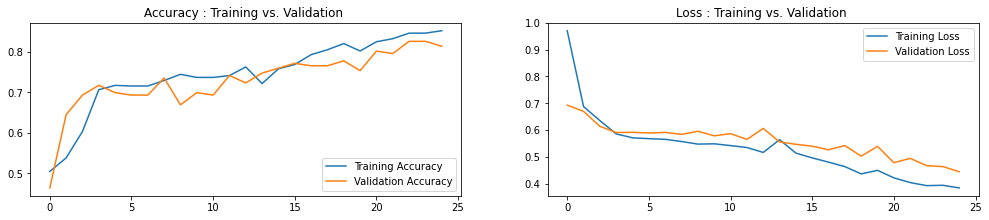

In [157]:
# round3
epochs = len(hst.epoch)
accuracy = hst.history['accuracy']
loss = hst.history['loss']
val_loss = hst.history['val_loss']
val_accuracy = hst.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.show()